# Further Exploration

Based on our conclusion, there is no geographic distribution of violations by zipcode areas. We would like to further explore our research to test other geographic factors, such as tracts, community area and etc.

By mapping the violations in the past three years, we found the red lights violation is not geographic clustered by tract areas. What’s more, the temperature effect interacted with tract areas is unconfirmed. Thus, there is a point in the future to test onwards whether the temperature has an effect to increase the number of violations by tract area, and value this effect in number.

In [1]:
import geopandas as gpd

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Census Tracts

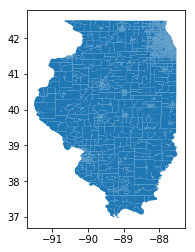

In [15]:
geo_df = gpd.read_file("/Users/Xinyuan/Downloads/hw-4-MeredithZ-master/data")
geo_df.plot()

Import the tracts for Chicago

In [16]:
tract_df = gpd.read_file("/Users/Xinyuan/Downloads/hw-4-MeredithZ-master/data")

In [17]:
tract_df = tract_df[tract_df["COUNTYFP"] == "031"]
tract_df.rename(columns = {"NAME" : "Census Tract"}, inplace = True)

There is latitudes and longitudes in our csv file. Import the csv and make the geometry

In [18]:
total_df = pd.read_csv("new1_csv.csv", usecols = [2, 3])
total_df.dropna(inplace = True)

To make the geometry, do a list comprehension to create a point from every (longitude, latitude) pair.

In [19]:
total_df.columns.tolist()

['latitude', 'longitude']

In [20]:
total_df.head()

,latitude,longitude
0,41.880482,-87.755127
1,41.881878,-87.745491
2,41.880482,-87.755127
3,41.887806,-87.765266
4,41.880356,-87.764946


In [21]:
import shapely

In [22]:
shapely

<module 'shapely' from '/Users/Xinyuan/anaconda3/envs/py-geo/lib/python3.6/site-packages/shapely/__init__.py'>

In [23]:
from shapely.geometry import Point

In [24]:
geometry = [Point(xy) for xy in zip(total_df.longitude, total_df.latitude)]
total_coords = gpd.GeoDataFrame(total_df, crs = {'init': 'epsg:4269'}, geometry=geometry)

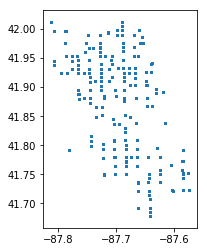

In [14]:
total_coords.plot(markersize = 1.5)

# Spatial Join of Violations Zip code Areas

In [25]:
total_df= gpd.sjoin(total_coords, tract_df, how = 'left', op = 'within')

Aggregate these groupby data to get a count per Census Tract

In [26]:
violation_tract_count = total_df.groupby("Census Tract").count()

Every column is the violation account

In [27]:
violation_tract_count = violation_tract_count[["index_right"]].rename(columns = {"index_right" : "Violation"})

Put the GeoDataFrame on the left

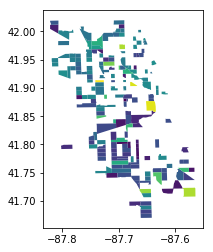

In [28]:
mapped_violations = pd.merge(tract_df, violation_tract_count, how = "inner", left_on = "Census Tract", right_index = True)
mapped_violations.plot(column = "Violation", k = 9, linewidth = 0)